# **Tugas**

#### **Mendeteksi orientasi teks dan jenis skrip** 
#### **Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.**

### **1 - Persiapan Gambar:**
    - Gunakan gambar contoh yang disediakan ('hitchhikers-rotated.png').
    - Tampilkan gambar asli menggunakan Python dan OpenCV.

In [1]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [2]:
import pytesseract

# Tentukan path ke executable Tesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
IMG_DIR = 'images/'

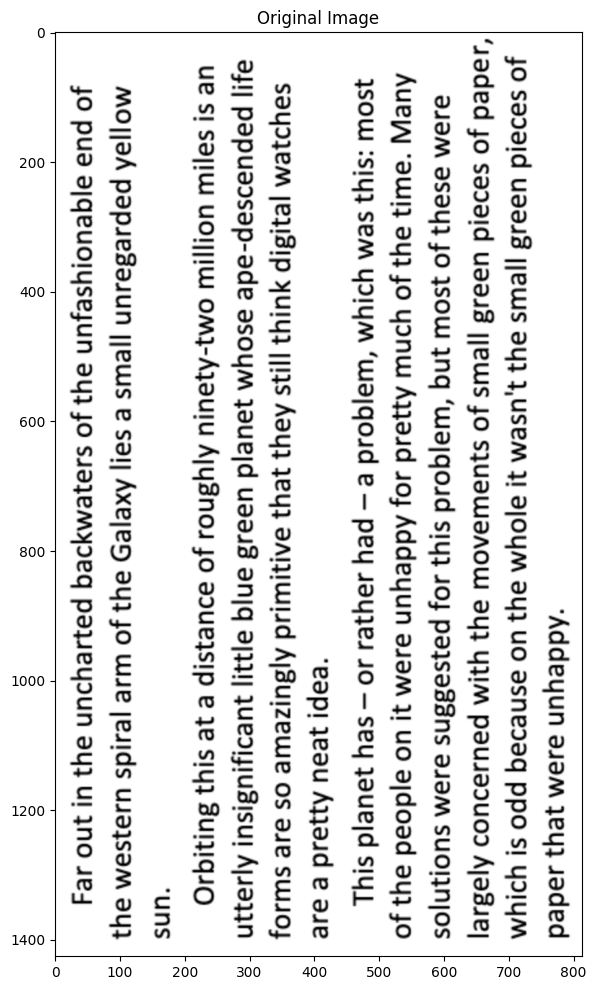

In [5]:
# Plot gambar original

# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('Original Image')
plt.show()



### **2 - Deteksi Orientasi dan Skrip:**
    - Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.
    - Gunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).
    - Tampilkan hasil orientasi dan jenis skrip.

### **Disini saya mencoba membandingkan 2 hasil pengerjaan saya yang 
    1. rotasi gambarnya dilakukan terlebih dahulu menggunakan library OpenCV2
    2. Menggunakan tesseract untuk mendapatkan sudut rotasi(angle)   

## Hasil dengan melakukan rotasi pada gambar sebesar 90° (derajat)

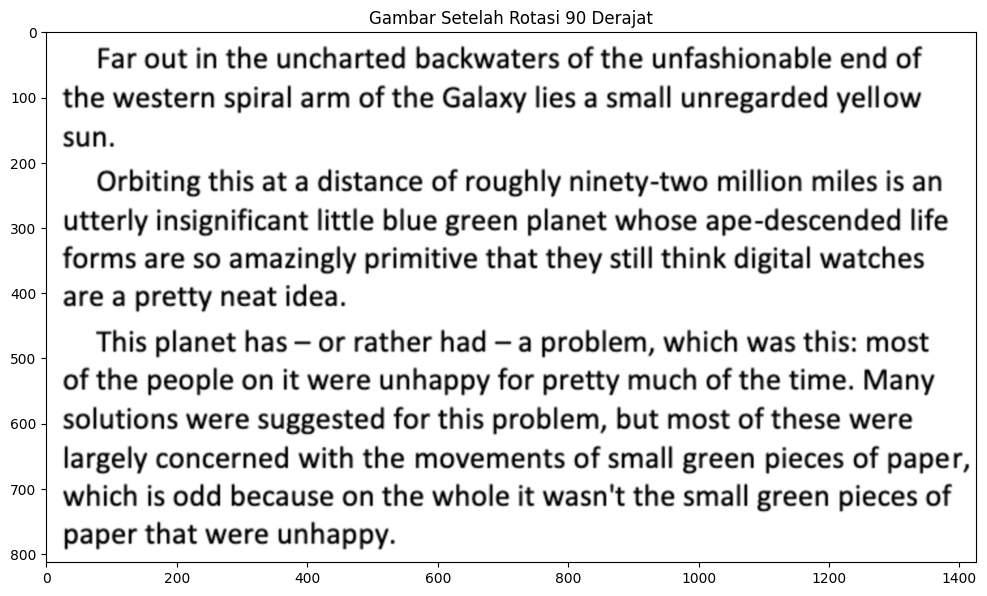

In [18]:
# Rotasi gambar 90 derajat searah jarum jam
rotasi_img = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Menampilkan gambar setelah rotasi 90 derajat
plt.figure(figsize=(12, 7))
plt.imshow(cv2.cvtColor(rotasi_img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Setelah Rotasi 90 Derajat')
plt.show()

In [19]:
# Mengubah gambar menjadi grayscale untuk meningkatkan akurasi OCR
gray_image = cv2.cvtColor(rotasi_img, cv2.COLOR_BGR2GRAY)

## Karena telah dilakukan rotasi secara manual sebesar 90° (derajat) sehingga hasil orientasinya pada Sudut Rotasi dan Arah Teks didapat yaitu 0. 

In [ ]:
# Menggunakan Tesseract untuk mendeteksi orientasi teks dan jenis skrip
ocr_data = pytesseract.image_to_osd(gray_image, output_type=pytesseract.Output.DICT)

# Menampilkan hasil deteksi orientasi dan jenis skrip
print("Hasil Deteksi Orientasi dan Jenis Skrip:")
print(f"- Sudut Rotasi (Angle): {ocr_data['rotate']} derajat")
print(f"- Arah Teks (Orientation): {ocr_data['orientation']}")
print(f"- Jenis Skrip (Script): {ocr_data['script']}")

# Koreksi Rotasi Berdasarkan Deteksi Sudut
# Jika rotasi terdeteksi, rotasi gambar ke orientasi yang benar
if ocr_data['rotate'] != 0:
    # Rotasi gambar ke arah yang benar
    (h, w) = gray_image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, -ocr_data['rotate'], 1.0)
    corrected_image = cv2.warpAffine(gray_image, M, (w, h))
    
    # Menampilkan gambar setelah koreksi rotasi
    plt.figure(figsize=(16, 12))
    plt.imshow(corrected_image, cmap='gray')
    plt.title('Gambar Setelah Koreksi Rotasi')
    plt.axis('off')
    plt.show()

# Deteksi Teks
# Menggunakan Tesseract untuk mendeteksi teks pada gambar
detected_text = pytesseract.image_to_string(corrected_image)

# Menampilkan hasil teks yang terdeteksi
print("\nHasil Deteksi Teks:")
print(detected_text)

Hasil Deteksi Orientasi dan Jenis Skrip:
- Sudut Rotasi (Angle): 0 derajat
- Arah Teks (Orientation): 0
- Jenis Skrip (Script): Latin

Hasil Deteksi Teks:
Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had —a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.



## Berikut ini adalah gambar dengan hasil orientasi teks pada gambar dan jenis script yang dilakukan rotasi menggunakan Tesseract:  

Hasil Deteksi Orientasi dan Jenis Skrip:
- Sudut Rotasi (Angle): 90 derajat
- Arah Teks (Orientation): 270
- Jenis Skrip (Script): Latin


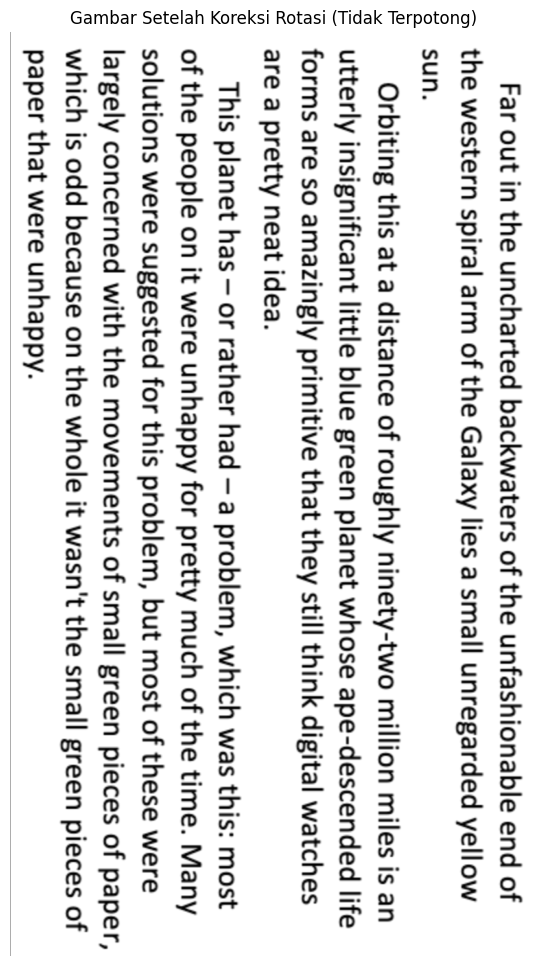


Hasil Deteksi Teks:
Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had —a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.




In [23]:
# Menggunakan Tesseract untuk mendeteksi orientasi teks dan jenis skrip
ocr_data = pytesseract.image_to_osd(image, output_type=pytesseract.Output.DICT)

# Menampilkan hasil deteksi orientasi dan jenis skrip
print("Hasil Deteksi Orientasi dan Jenis Skrip:")
print(f"- Sudut Rotasi (Angle): {ocr_data['rotate']} derajat")
print(f"- Arah Teks (Orientation): {ocr_data['orientation']}")
print(f"- Jenis Skrip (Script): {ocr_data['script']}")

# Koreksi Rotasi Berdasarkan Deteksi Sudut
# Jika rotasi terdeteksi, rotasi gambar ke orientasi yang benar
if ocr_data['rotate'] != 0:
    (h, w) = gray_image.shape[:2]
    center = (w // 2, h // 2)
    
    # Mendapatkan bounding box baru untuk menyesuaikan rotasi
    M = cv2.getRotationMatrix2D(center, -ocr_data['rotate'], 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    
    # Hitung bounding box baru untuk gambar yang telah dirotasi
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))
    
    # Sesuaikan matriks rotasi dengan translasi
    M[0, 2] += (new_w / 2) - center[0]
    M[1, 2] += (new_h / 2) - center[1]
    
    # Rotasi gambar dengan ukuran bounding box baru
    corrected_image = cv2.warpAffine(gray_image, M, (new_w, new_h))
    
    # Menampilkan gambar setelah koreksi rotasi
    plt.figure(figsize=(16, 12))
    plt.imshow(corrected_image, cmap='gray')
    plt.title('Gambar Setelah Koreksi Rotasi (Tidak Terpotong)')
    plt.axis('off')
    plt.show()
    
# Deteksi Teks
# Menggunakan Tesseract untuk mendeteksi teks pada gambar
detected_text = pytesseract.image_to_string(corrected_image)

# Menampilkan hasil teks yang terdeteksi
print("\nHasil Deteksi Teks:")
print(detected_text)